In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob

In [3]:
path = '../input/flickr8k-sau/Flickr_Data/Images/'
image1 = '../input/flickr8k-sau/Flickr_Data/Images/1000268201_693b08cb0e.jpg'
images = glob(path+'*.jpg')

In [4]:
images[:1]

['../input/flickr8k-sau/Flickr_Data/Images/3226254560_2f8ac147ea.jpg']

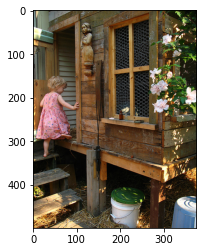

In [5]:
import matplotlib.pyplot as plt
plt.figure()
img = cv2.imread(image1)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

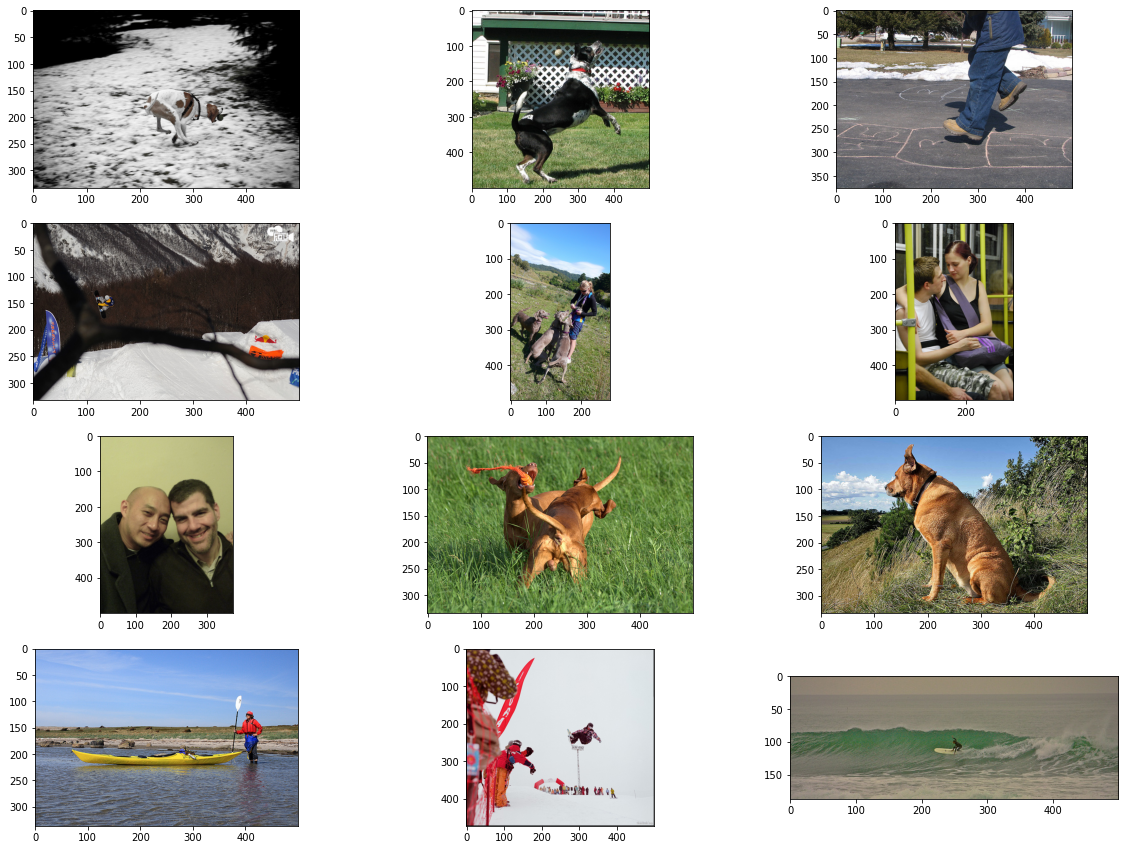

In [6]:
fig, axs = plt.subplots(4,3, figsize=(20, 15))
#fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(12):
    
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    axs[i].imshow(img)

In [7]:
from keras.applications import ResNet50

resnet = ResNet50(include_top=True)

In [8]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [9]:
from keras.models import Model

model = Model(inputs = resnet.input, outputs = resnet.layers[-2].output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
len(images)

8091

In [11]:
train_name = open('../input/flickr8k-sau/Flickr_Data/Flickr_TextData/Flickr_8k.trainImages.txt','rb').read().decode('utf-8').split('\n')
test_name = open('../input/flickr8k-sau/Flickr_Data/Flickr_TextData/Flickr_8k.testImages.txt','rb').read().decode('utf-8').split('\n')

In [12]:
train_images_features = {}
count = 0
for i in images:
    img_name = i.split('/')[-1]
    if img_name in train_name:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224,224))

        img = img.reshape(1,224,224,3)
        pred = model.predict(img).reshape(2048,)



        train_images_features[img_name] = pred

        count += 1
        
        if count > 1800:
            break

        elif count % 50 == 0:
            print(count)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800


## Text

In [13]:
text_path = '../input/flickr8k-sau/Flickr_Data/Flickr_TextData/Flickr8k.token.txt'
texts = open(text_path,'rb').read().decode('utf-8').split('\n')

In [14]:
len(texts)

40461

In [15]:
text_dict = {}
for i in texts:
    try:
        img_name = i.split('\t')[0][:-2] 
        text = i.split('\t')[1]
        if img_name in train_images_features:
            if img_name not in text_dict:
                text_dict[img_name] = [text]
                
            else:
                text_dict[img_name].append(text)
            
    except:
        pass

In [16]:
len(text_dict)

1801

In [17]:
images[1]

'../input/flickr8k-sau/Flickr_Data/Images/214543992_ce6c0d9f9b.jpg'

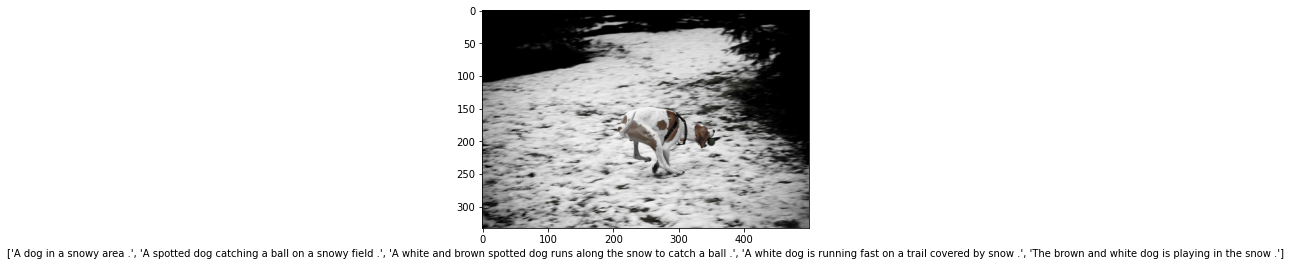

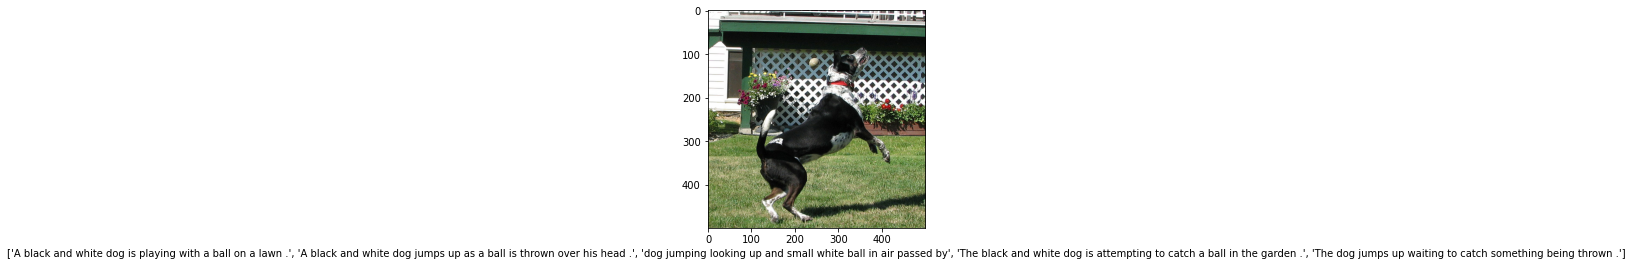

<Figure size 432x288 with 0 Axes>

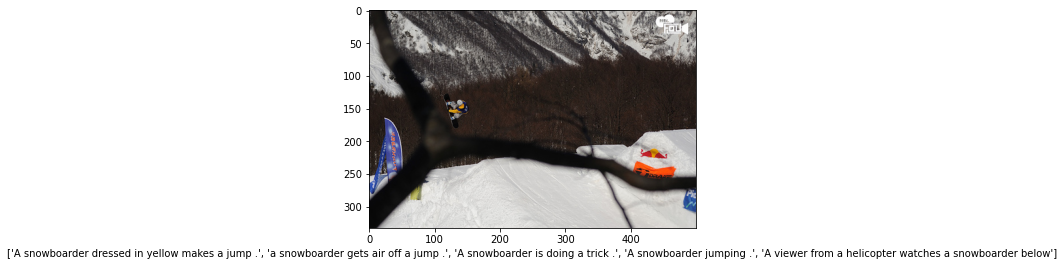

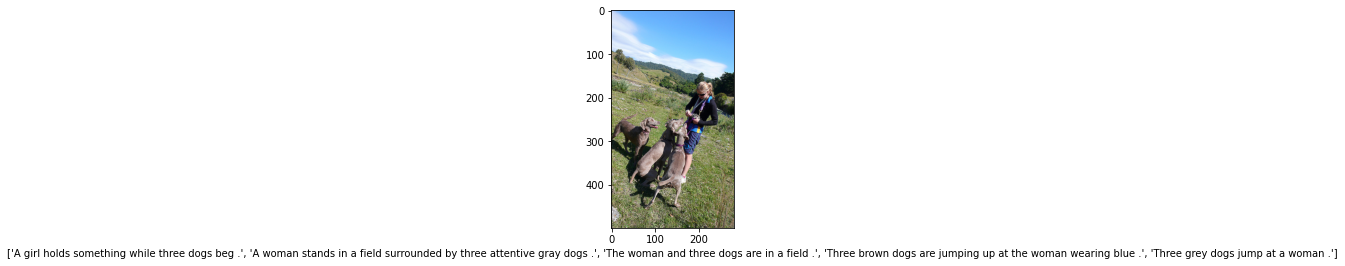

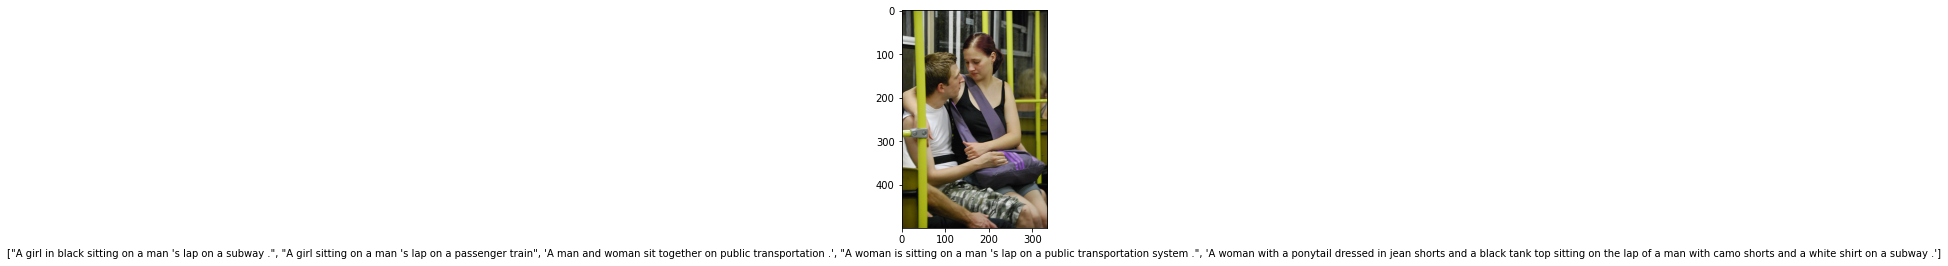

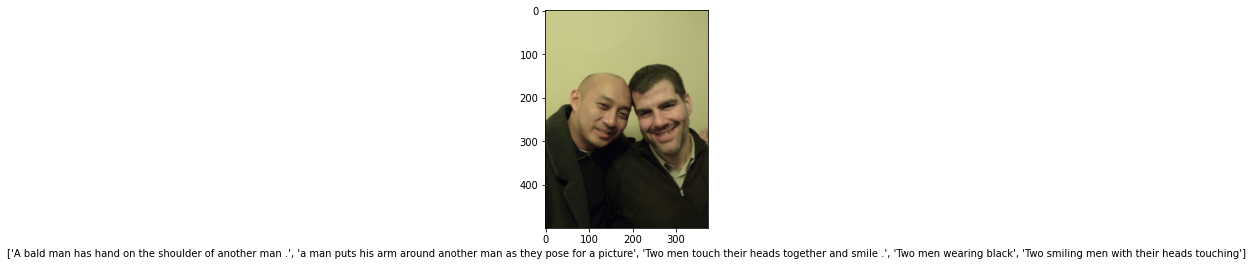

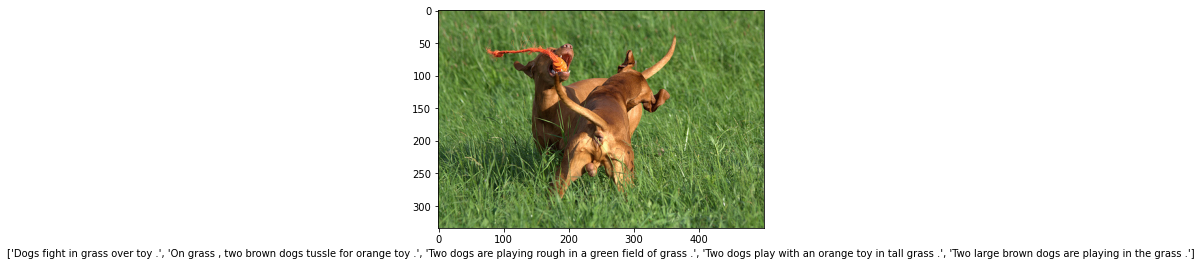

<Figure size 432x288 with 0 Axes>

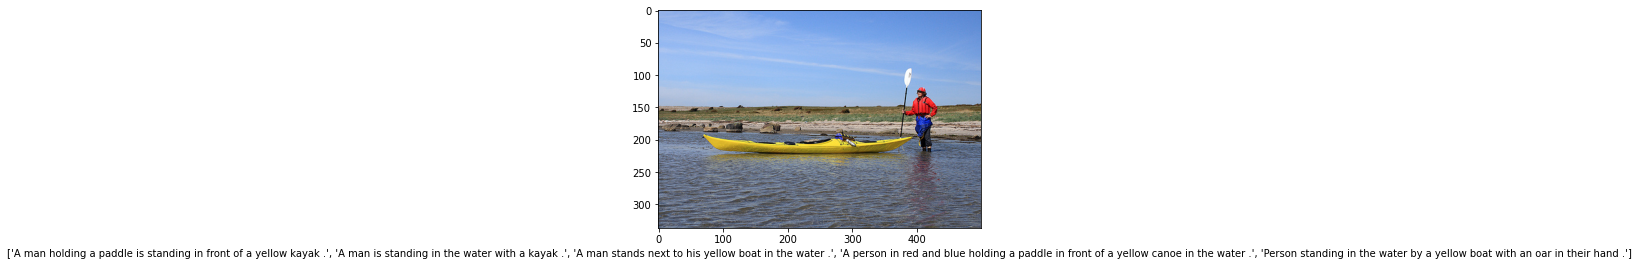

In [18]:
for i in range(10):
    plt.figure()
    img_name = images[i]
    if img_name.split('/')[-1] in train_name:
        img = cv2.imread(img_name)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.xlabel(text_dict[img_name.split('/')[-1]])
        plt.imshow(img)

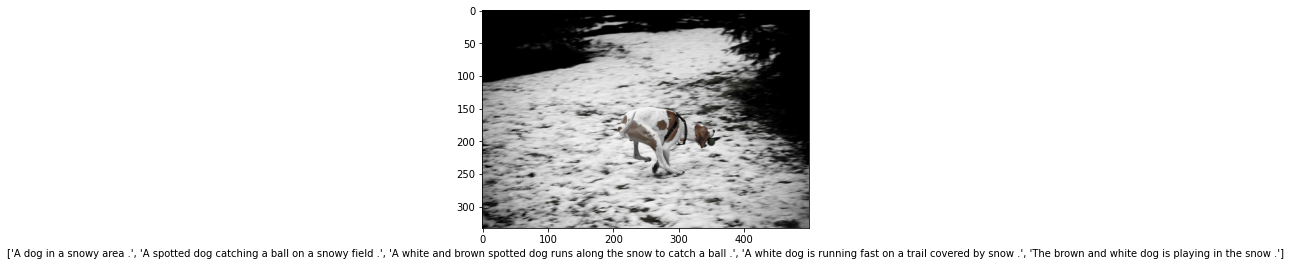

In [19]:
for k in train_images_features.keys():
    plt.figure()
    
    img_name = '../input/flickr8k-sau/Flickr_Data/Images/' + k
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(text_dict[img_name.split('/')[-1]])
    plt.imshow(img)
    
    break

In [20]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified

In [21]:
for k,v in text_dict.items():
    for vv in v:
        text_dict[k][v.index(vv)] = preprocessed(vv)

## Vocab

In [22]:
count_words = {}
for k,vv in text_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [23]:
len(count_words)

4420

In [24]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1

In [25]:
len(new_dict)

4420

In [26]:
new_dict['<OUT>'] = len(new_dict)

In [27]:
text_backup = text_dict.copy()

In [28]:
text_dict = text_backup.copy()

In [29]:
for k, vv in text_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])


        text_dict[k][vv.index(v)] = encoded

In [30]:

text_dict['1002674143_1b742ab4b8.jpg']

[[1, 2, 3, 4, 5, 6, 7, 8, 6, 9, 10, 2, 11, 12, 13, 14, 15, 6, 2, 16, 17, 18],
 [1, 2, 3, 4, 19, 20, 6, 9, 10, 2, 21, 11, 12, 17, 18],
 [1,
  2,
  22,
  4,
  6,
  23,
  24,
  25,
  13,
  26,
  6,
  9,
  10,
  2,
  27,
  28,
  13,
  2,
  12,
  29,
  30,
  17,
  18],
 [1, 31, 19, 2, 4, 13, 32, 20, 6, 9, 10, 2, 12, 33, 17, 18],
 [1, 34, 4, 13, 32, 33, 35, 6, 23, 24, 17, 18]]

## Generator

In [31]:
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [32]:
MAX_LEN = 0
for k, vv in text_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 5, 6, 7, 8, 6, 9, 10, 2, 11, 12, 13, 14, 15, 6, 2, 16, 17, 18]
[1, 2, 22, 4, 6, 23, 24, 25, 13, 26, 6, 9, 10, 2, 27, 28, 13, 2, 12, 29, 30, 17, 18]
[1, 2, 63, 19, 72, 23, 170, 10, 2, 165, 132, 121, 171, 172, 6, 9, 10, 173, 174, 62, 70, 63, 169, 29, 17, 18]
[1, 2, 230, 279, 6, 645, 226, 46, 2, 76, 184, 87, 29, 2, 107, 13, 154, 138, 27, 46, 47, 646, 46, 2, 378, 647, 604, 255, 17, 18]
[1, 23, 99, 34, 294, 59, 6, 36, 46, 27, 1237, 46, 1238, 62, 369, 6, 2, 585, 138, 415, 59, 130, 1239, 295, 2, 63, 1240, 6, 1237, 46, 2, 425, 18]
[1, 2, 63, 279, 6, 36, 46, 72, 2, 1404, 6, 171, 15, 19, 264, 29, 2, 302, 204, 2, 1405, 508, 1406, 167, 1407, 121, 2, 473, 1408, 121, 1300, 1409, 17, 18]
[1, 62, 53, 27, 37, 19, 35, 23, 260, 138, 70, 27, 37, 13, 2, 36, 2499, 29, 322, 383, 19, 49, 140, 2, 796, 569, 260, 62, 242, 327, 295, 2, 324, 325, 17, 18]


In [33]:
Batch_size = 2000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out

In [34]:
X, y_in, y_out = generator(train_images_features, text_dict)

In [35]:
len(X), len(y_in), len(y_out)

(115838, 115838, 115838)

In [36]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [37]:
X.shape, y_in.shape, y_out.shape

((115838, 2048), (115838, 36), (115838, 4421))

In [38]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [39]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)
 
# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 36, 128)           0         
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 36, 128)           565888    
_________________________________________________________________
lstm (LSTM)                  (None, 36, 256)           394240    
_________________________________________________________________
time_distributed (TimeDistri (None, 36, 128)           32896     
Total params: 993,024
Traina

In [40]:
model.fit([X, y_in], y_out, batch_size=256, epochs=100)

Epoch 1/100
453/453 [==============================] - 23s 40ms/step - loss: 5.4027 - accuracy: 0.1166
Epoch 2/100
453/453 [==============================] - 18s 40ms/step - loss: 4.8061 - accuracy: 0.2032
Epoch 3/100
453/453 [==============================] - 18s 40ms/step - loss: 4.3384 - accuracy: 0.2540
Epoch 4/100
453/453 [==============================] - 18s 39ms/step - loss: 4.0357 - accuracy: 0.2862
Epoch 5/100
453/453 [==============================] - 18s 40ms/step - loss: 3.7588 - accuracy: 0.3188
Epoch 6/100
453/453 [==============================] - 18s 40ms/step - loss: 3.5581 - accuracy: 0.3404
Epoch 7/100
453/453 [==============================] - 18s 40ms/step - loss: 3.4095 - accuracy: 0.3597
Epoch 8/100
453/453 [==============================] - 18s 39ms/step - loss: 3.2757 - accuracy: 0.3796
Epoch 9/100
453/453 [==============================] - 18s 39ms/step - loss: 3.1772 - accuracy: 0.3890
Epoch 10/100
453/453 [==============================] - 18s 40ms/step - l

In [52]:
inv_dict = {v:k for k, v in new_dict.items()}

In [53]:
model.save('model.h5')

In [54]:
model.save_weights('mine_model_weights.h5')

In [55]:
np.save('vocab.npy', new_dict)

In [56]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (299,299))

    test_img = np.reshape(test_img, (1,299,299,3))
    
    return test_img

In [64]:
model_res = Model(inputs = resnet.input, outputs = resnet.layers[-2].output)

## Prediction

In [58]:
label = {}
for i in texts:
    try:
        img_name = i.split('\t')[0][:-2] 
        text = i.split('\t')[1]
        if img_name not in label:
            label[img_name] = [text]
                
        else:
            label[img_name].append(text)
            
    except:
        pass

In [63]:
img_path = '../input/flickr8k-sau/Flickr_Data/Images/'
test_img = cv2.imread(test_img_path)
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

test_img = cv2.resize(test_img, (299,299))

test_img = np.reshape(test_img, (1,299,299,3))


In [ ]:
for i in range(10):
    
    no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = model_res.predict(getImage(no)).reshape(1,2048)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)

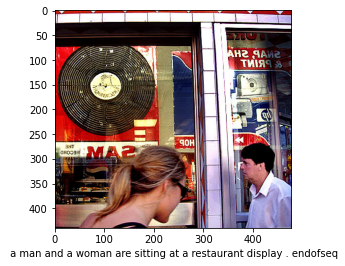

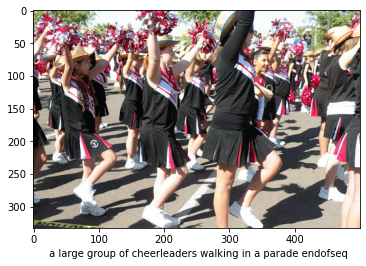

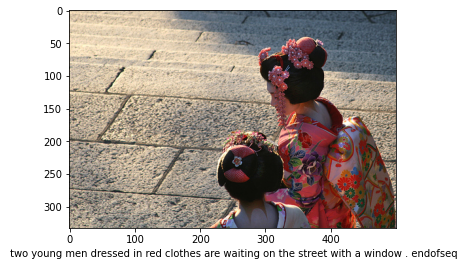

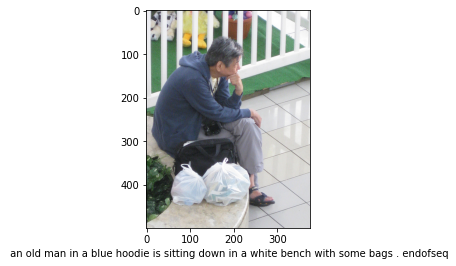

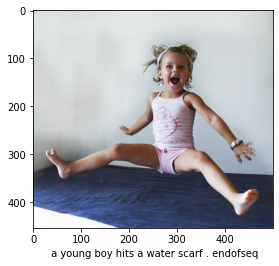

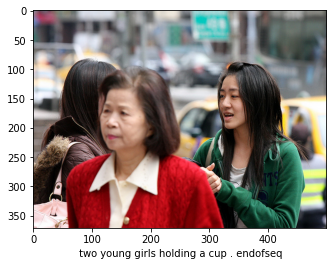

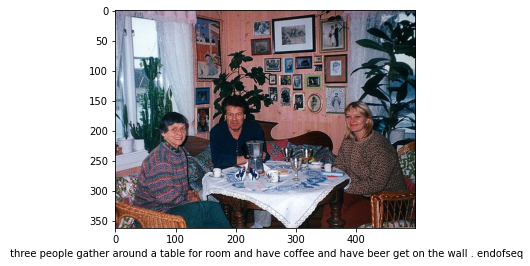

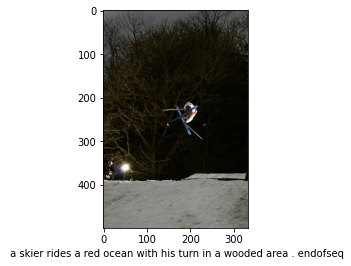

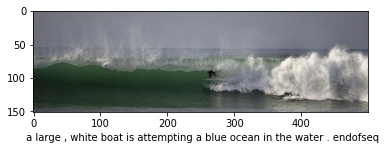

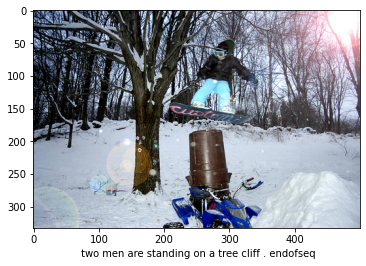

In [73]:
for i in range(10):
    
    no = np.random.randint(1,1000,(1,1))[0,0]
    test_img_path = img_path+train_name[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    test_feature = model_res.predict(test_img).reshape(1,2048)
    
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
        
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)